In [14]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt


leer Archivo

In [15]:
with open('data.json', 'r') as f:
    data = json.load(f)

df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


Procesar datos

In [26]:
#df.isnull().sum()

df = df[df['Churn'].astype(str).str.strip() != '']

df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors='coerce')
#df['account.Charges.Total'].dtype

# Función para convertir "si"/"no" a True/False
def convert_si_no_to_bool(series):
    return series.str.lower().map({'yes': True, 'no': False})

# Aplicar conversión a columnas que contengan "si"/"no"
for col in df.columns:
    if df[col].dtype == 'object':  
        unique_vals = df[col].astype(str).str.lower().unique()
        if 'si' in unique_vals or 'no' in unique_vals:
            df[col] = convert_si_no_to_bool(df[col])

try: 
    std_charges = df['account.Charges.Total'].std()
    mean = df['account.Charges.Total'].mean()
    #print(f"\nDesviasion estandar: {std_charges}")
    #print((std_charges/ mean)*100)
except Exception as e:
    print(f"Error: {e}")

#Cuentas diarias
df["account.Charges.Diary"] = df["account.Charges.Monthly"] / 30
#df[['account.Charges.Monthly', "account.Charges.Diary"]]

#df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   bool   
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   bool   
 5   customer.Dependents        7043 non-null   bool   
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   bool   
 8   phone.MultipleLines        6361 non-null   object 
 9   internet.InternetService   1526 non-null   object 
 10  internet.OnlineSecurity    5517 non-null   object 
 11  internet.OnlineBackup      5517 non-null   object 
 12  internet.DeviceProtection  5517 non-null   object 
 13  internet.TechSupport       5517 non-null   object 
 1

Contar los valores de Churn

In [22]:
churn = df["Churn"]
churn_counts = churn.value_counts()

# Graficos

gráfico circular

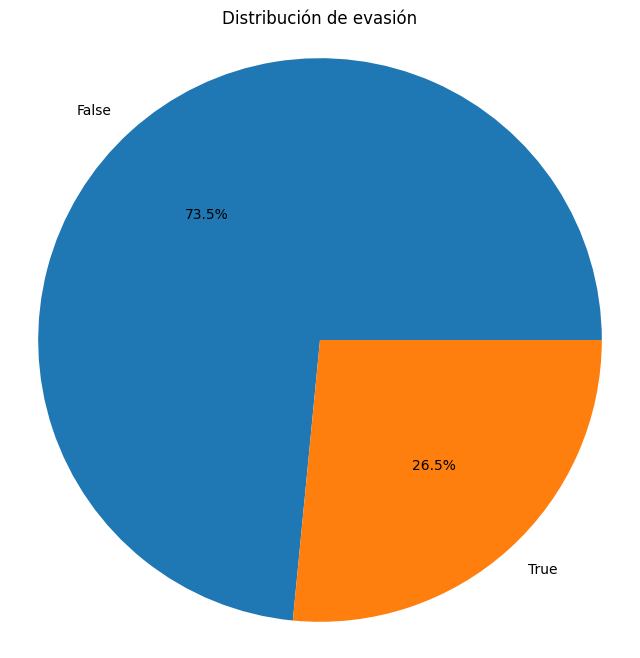

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title('Distribución de evasión')
plt.axis('equal')
plt.show()

gráfico de barras para relacionar Churn con Contract

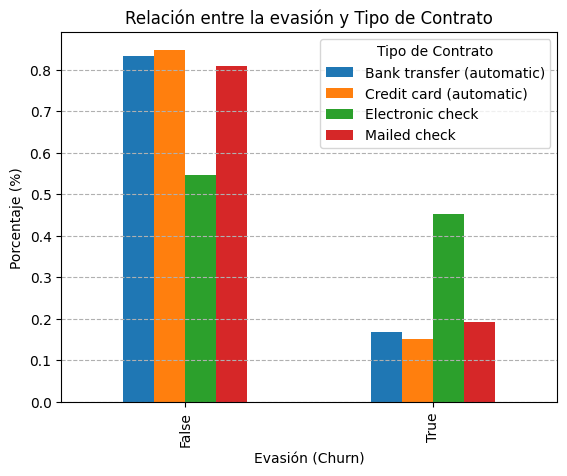

In [24]:
churn_contract = pd.crosstab(df['Churn'], df['account.PaymentMethod'], normalize='columns')
churn_contract.plot(kind='bar', stacked=False)
plt.title('Relación entre la evasión y Tipo de Contrato')
plt.xlabel('Evasión (Churn)')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Tipo de Contrato')
plt.grid(axis='y', linestyle='--')
plt.show()

Grafico de relacion entre el churn y contrato mensual

# Informe de Análisis de Evasión de Clientes (Churn Analysis)

## Introducción

El presente análisis tiene como objetivo comprender y analizar el comportamiento de evasión de clientes (Churn) en la empresa de telecomunicaciones TelecomX. 

---

## Limpieza y Tratamiento de Datos

### Importación de Datos
- Se cargaron los datos desde un archivo JSON utilizando la librería panda con json_normalize() para estructurar los datos anidados en un DataFrame.

### Proceso de Limpieza
1. - Se removieron las filas donde el campo 'Churn' estaba vacío o contenía espacios en blanco.

2. 
   - Los cargos totales (account.Charges.Total) se convirtieron a formato numérico usando pd.to_numeric() con manejo de errores.
   - Se implementó una función personalizada para convertir valores "yes"/"no" a booleanos (True/False).

3. 
   - Se calculó el cargo diario (account.Charges.Diary) dividiendo el cargo mensual entre 30 días.

4. 
   - Se calcularon la desviación estándar y la media de los cargos totales para identificar la variabilidad en los datos.


Se verificó la información del DataFrame con df.info() para confirmar los tipos de datos y la presencia de valores nulos.

---

# Análisis Exploratorio de Datos

**Gráfico circular (pie chart)**
- Se analizó la distribución general de clientes que se han dado de baja vs. los que permanecen activos.
- Este análisis proporciona una visión general del porcentaje de evasión en la base de clientes.


**Visualización:Gráfico de barras con tabla cruzada**
- Se examinó la relación entre la evasión de clientes y el método de pago utilizado.
- Se utilizó normalización por columnas para obtener porcentajes comparables.
- El gráfico de barras no apiladas permite comparar fácilmente las tasas de evasión entre diferentes métodos de pago.

---

# Conclusiones
Se identificaron diferencias significativas en las tasas de evasión según el método de pago utilizado.
Algunos métodos de pago muestran mayor correlación con la retención de clientes, en este caso el metodo que presentaba una mayor tasa de evasión 
fue el cheque electronico con amplia diferencia. Esto implicaria que probablemente los clientes que utlizen este metodo de pago se viesen afectados
por una falla común, que los lleve a abandonar a la empresa.

# Recomendaciones

   - Desarrollar programas de retención específicos basados en el método de pago preferido del cliente.

   - Implementar intervenciones proactivas antes de que el cliente decida cancelar.

   - Promover métodos de pago que están asociados con mayor retención.
   - Revisar las políticas y procesos relacionados con métodos de pago problemáticos.
